Notas:
--------
Estoy ajustando el grafico KG, para guardarlo en un pdf con todos los graficos correspondientes al canal tradicional

__Revisar resultados:__

_Todos los promedios son en base a las facturaciones, sin poderar, ya que el modelo predictivo no contemplará una definición del precio según el volumen.(promedio ponderado)_
- [ ] Variación del precio mensua
- [ ] Variación del precio promedio 
- [ ] Variación del Ingreso promedio 
- [ ] Dispersipon del precio/KG

__Construir:__
- [ ] Precio Semanal de los clientes general
- [ ] Precio Semanal del canal(Facturaciones)
- [ ] Precio Semanal/año de los clientes para cada año
- [ ] Avance precio día, dispersión

__Passos siguientes:__
- Revisar el latex, para entender que pasos seguir
- Modelo de regresión que muestra la dispesión del precio respecto al volumen


In [1]:
#!jt -l
#!jt -t oceans16 -T
!jt -r

Reset css and font defaults in:
C:\Users\user\.jupyter\custom &
C:\Users\user\AppData\Roaming\jupyter\nbextensions


# Inicio
__Rename__
Recordar que la columna llamada

- `Precio promedio` ahora es `Precio`
- `Centro.1` ahora es `Centro`

Presenta los parametros del modelo:

- Dirección datos
- Dirección Graficos
- _Material a analizar_
- _Canal a analizar_
- _Zona de los Datos_
- _Año de inicio de analizis_

Base de datos


`Tipo_de_Cliente`
`Y_producto`
`Año_inicio`

`file_direct_Graphic` 

## Parametros 

In [2]:
#===================================
# Archivo
#===================================
Zona_df='Z001'

#===================================
# Clientes
#===================================
Tipo_de_Cliente='Tradicional'

#===================================
# Producto de interes
#===================================
Y_producto='1010078'


#===================================
# Año de Partida
#===================================
Año_inicio='2018'




# Ordenador de escritorio

file_direct_O="C:/Users/user/Documents/Data/Data Clear/"+Zona_df+"/"
file_direct_Clear="C:/Users/user/Documents/Data/Data Clear/"
file_direct_Graphic='C:/Users/user/Documents/Graficos'
Png_file_direct_Graphic="C:\\Users\\user\\Documents\\Graficos"
"""

#Notebook
file_direct_O="C:/Users/rolft/Documents/Repositorios/Data/Data Clear/"+Zona_df+"/"
file_direct_Clear="C:/Users/rolft/Documents/Repositorios/Data/Data Clear/"
file_direct_Graphic='C:/Users/rolft/Documents/Repositorios/Graficos'
"""
#Graficos
file_direct_Graphic_Canal=file_direct_Graphic+"/"+Tipo_de_Cliente
file_direct_Graphic_Canal_Material=file_direct_Graphic_Canal+'/'+Y_producto

Png_file_direct_Graphic_Canal=Png_file_direct_Graphic+'\\'+'Canal '+Tipo_de_Cliente
Png_file_direct_Graphic_Canal_Material=Png_file_direct_Graphic_Canal+'\\'+Y_producto


## Intalar paquetes, Abrir data y ajustarla 

### import

In [3]:
#from adjustText import adjust_text
from adjustText import *

In [4]:
#=====================================================
                # BASE 
#-----------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#from geopandas import *

from plotnine import *

#para ajustar las fechas
import datetime

#para calcular el skew de un array() o list()
from scipy.stats import skew 

In [5]:
#=====================================================
                # sklearn 
#-----------------------------------------------------

#Separador de datos en train/test
from sklearn.model_selection import train_test_split

#Prediccion Ridge Regression
from sklearn.linear_model import Ridge

In [6]:
#=====================================================
                # statsmodels 
#-----------------------------------------------------
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.sm_exceptions import ConvergenceWarning


#from statsmodels.regression.mixed_linear_model import MixedLMResults
# No se para qué sirve este

In [7]:
#====================================================
#librerias para crear division de series temporales
#====================================================

from mizani.breaks import date_breaks
from mizani.formatters import date_format

In [8]:
# stopwatch
import time
def time_convert(sec):
  mins = sec // 60
  sec = sec % 60
  hours = mins // 60
  mins = mins % 60
  print("Time Lapsed = {0}:{1}:{2}".format(int(hours),int(mins),sec),'\n H:m:s')
#==================================
#          Example
#    input("Press Enter to start")
#    start_time = time.time()
#    input("Press Enter to stop")
#    end_time = time.time()
#    time_lapsed = end_time - start_time
#    time_convert(time_lapsed)
#=================================

### Funciones 
```python
#Mes_name
data_i.Mes.apply(Mes_name)
```
>Transforma la columna mes numerica en el nombre del mes

__Forma de crear una etiqueta para un valor especifico__
```python
#[Y_Graph]
dfz=df.copy()
dfz['Año select']=dfz.apply( lambda x: x['Año'] if x['Año']==2020 else '',axis=1)
dfz
```

In [9]:
#===================================
# Dicionario MES
#===================================

#===================================
# Fecha
D=['Enero','Febrero','Marzo','Abril',
 'Mayo','Junio','Julio','Agosto',
 'Septiembre','Octubre',
 'Noviembre','Diciembre']
Month_dic={i:D[i-1]  for i in range(1,13)}
#===========================================


def Mes_name(x):
    D=['Enero','Febrero','Marzo','Abril',
    'Mayo','Junio','Julio','Agosto',
    'Septiembre','Octubre',
    'Noviembre','Diciembre']
    return(D[int(x)-1])

## Datos  
Se cargan los datos de
Ventas y la defincion de los productos
Ventas está en `data_v` y despues pasa a ser `data`

Productos estan cargados en `DF_products`


###  DF_FULL

##### Abrir Archivo  

In [10]:
#======================================================================
# Se Cargan los datos de ventas con las caracteristicas de los clientes
#=====================================================================

file_direct=file_direct_O+'Ventas_Full'+'.csv'
col_names=pd.read_csv(file_direct,
                      encoding="utf-8",sep=";",nrows=0).columns

types_dict = {col: str for col in list(col_names)}

DF_FULL = pd.read_csv(file_direct,
                   encoding="utf-8",sep=";",dtype=types_dict)
#elimina una columna en especifico
#DF_FULL.drop('Año natural', inplace=True, axis=1)
DF_FULL.head(1)

,Zona de ventas,Zona de ventas.1,Cliente,Cliente.1,Cliente - Local,Cliente - Local.1,Material,Día natural,Kilos Venta KG,Venta Neta,...,Tipo de material.1,Marca,Nivel 2,Granel/Envasado,Marinado,Nivel 3,Grupo artículos,Estado,Estandar,Envase
0,Z001,Santiago,10003742,Ferrer Leiva Sonia,Ferrer Leiva Sonia,38458,1010077,2018-02-09,12.0,13685.0,...,Prod. Term. Ave,SUPER POLLO (SP),Trutro,GRANEL,MARINADO,Trutro Entero,01050,REFRIGERADO,PESO VARIABLE,NO CONGELADO


#### Funcion

In [11]:
# =============================================================================
# Ajustar la data
# =============================================================================
def Ajuste_data(data):
    start_time = time.time()

    df=data.copy()

# =================================
# ELiminare dodos los valores Nan
# =================================
    #for i in df.columns.to_list():
    #    df=df[df[i].notna()]

#=================================
# Proceso iterativo Pasar a numero
#=================================

    for i in ['Kilos Venta KG','Venta Neta','Precio Promedio']:
        df[i]=df[i].astype('float64').astype('int64')
        
#=================================
# Agregar nombre al codigo del producto
#=================================
    def material_name(x):
        s1=str(x['Material'])
        s2=str(x['Nivel 4.1'])
        return(s1+'('+s2+')')
    df['Material (Nombre)']=df.apply(lambda x:  material_name(x), axis=1)
    


#==========================================================================================
# Ajuste de las fechas
#-----------------------------------------------------------------------------------------
    df["Día natural"] = df["Día natural"].apply(lambda x: 
                                                datetime.datetime.strptime(str(x),
                                                                           '%Y-%m-%d').date())
    
    #Separacion fecha
    
    #df['Semana']=df["Día natural"].apply(lambda x: x.isocalendar()[1] )
    #df['Mes']=df["Día natural"].apply(lambda x: x.month)
    #df['Año']=df["Día natural"].apply(lambda x: x.year)
    #df['Semana']=df['Semana'].astype('int64')
    df['Año']=df['Año'].astype('int64')
    D_W=['Lunes','Martes','Miércoles','Jueves', 'Viernes','Sábado','Domingo']
    df['Día Semana']=df["Día natural"].apply(lambda x: D_W[x.isocalendar()[2] -1])
    df=df[df['Día Semana']!='Domingo']
    
    DF_FULL.dtypes
    end_time = time.time()
    time_convert(end_time - start_time)
    return df

### Datos año de inicio
#### Rename

In [12]:
#=====================================
# Aplicacion del ajuste de los datos
#=====================================

data=Ajuste_data(DF_FULL).rename(
    columns={'Precio Promedio':'Precio'
            #,'Centro.1':'Centro'
            })
data['Centro_cod']=data['Centro']
data['Centro']=data['Centro.1']

data[data.Año>=int(Año_inicio)]
data.dtypes

Time Lapsed = 0:0:20.386157035827637 
 H:m:s


Zona de ventas          object
Zona de ventas.1        object
Cliente                 object
Cliente.1               object
Cliente - Local         object
Cliente - Local.1       object
Material                object
Día natural             object
Kilos Venta KG           int64
Venta Neta               int64
Precio                   int64
Frecuencia Historica    object
Centro                  object
Centro.1                object
Población               object
Tipo de cliente         object
Cluster                 object
Segmento                object
Segmento.1              object
Categoría Cliente       object
Zona de reparto         object
Año Creación            object
Material Favorito       object
Semana                  object
Mes                     object
Año                      int64
Nivel 4                 object
Nivel 4.1               object
Sector                  object
Tipo de material        object
Tipo de material.1      object
Marca                   object
Nivel 2 

In [13]:
#=============================
# Se eliminaron los regristros donde existen dias domingos
#(No hay despacho los dias domingos)
#============================

data.shape[0] - DF_FULL.shape[0]

-256

# Selección data(Canal/material)
data frame `data_i`


> - Producto `i_producto = Y_producto`
> -Para el Canal `Tipo_de_Cliente`
> -Variable a predecir/Grafico `Y_Variable`

Columnas de interes para predecir `X_col`

Diccionario del grupo de columnas `Dic_col`

## data 

##### Definición del producto 

In [14]:
#==============================
# Se define el producto
#==============================
i_producto=Y_producto
print(i_producto
     ,Tipo_de_Cliente)

data_i=data[
    (data['Tipo de cliente']==Tipo_de_Cliente)
    &(data.Material==i_producto)
].copy()


1010078 Tradicional


### Columnas a usar 
rename aplicado a `Precio promedio`

###### Columnas a usar 

In [15]:
#=======================================================================================================
                                                # Columnas a usar
#========================================================================================================

data_i=data_i[[
                    #======================================   
                                    # Base de la venta
                    #--------------------------------------

'Material (Nombre)',
    #ID Nombre
    
#========================
#Cantidad/Ingreso/Precio
#------------------------
'Kilos Venta KG',
#'Venta Neta', No es necesario o de interes para la prediccion
'Precio',

#========================
#fecha
#------------------------
'Día natural', #Se descarta por series de tiempo
    # Ver si funciona

'Día Semana',
    #lun, Mart, Mier, Juev
'Semana',
    #1, 2 , 3 ,..., 52, 53
'Mes',
    #1,2,3,...,12
'Año',
    #2018,2019,...,2021
    
    

#______________________________________________________________________
                        
                                    # CLIENTE
    
#=====================================
#Ubicacion del cliente
#-------------------------------------
'Población', #'Zona de reparto',
#Comuna del Cliente ; Codigo de la zona de reparto
#[No son excluyentes, la Zona de reparto
#Es más especifica y agrupa a clientes]


                #Region
                #'Zona de ventas',
                #'Zona de ventas.1',
                    #(Z001: Santiago)

#Es atendido por la Centro:
'Centro', #'Centro', Centro de distribución de los productos
    #ID Centro, Nombre Centro(oficina o centro)
    
#=========================================    
#Identificacion del cliente
#---------------------------------------
'Cliente', #'Cliente.1',
     #ID del cliente , #nombre del cliente
 #'Cliente - Local', 'Cliente - Local.1'
     # Tambien funciona como ID
         #ID, Nombre

    #Agrupacion del cliente
    #'Tipo de cliente', #SON TODOS IGUALES
    'Cluster', 
         #Canal del cliente ; Tipo de cliente
             #Tradicional   ; Clasico

    #Nivel de cobertura
    #'Segmento', 
     'Segmento.1',
     #codigo ; nombre
         #50 ; Cobertura pequeno SD
    'Categoría Cliente',
            #Especialista en Proc


    #===================================================
    #Caracteristicas Adiocinales a su consumo
    #-------------------------------------------------
        'Año Creación',
            #Fecha de afiliación a Agrosuper
             #-> Debe ser INT idealmente

        'Material Favorito',
             #ID del producto que ha comprado más frecuentemente
             #(No por cantidad, si no que por cantidad de compras realizadas)
                 #-> Puede ser solo el codigo o el nombre tambien

        'Frecuencia Historica',
             #Cantidad de compras realizadas desde el 2018
                 #-> debe ser INT
                     #-> constante para todas las compras
                            # Al ser variable complejiza todo
 
]]


###### Ajuste de type de columnas 

In [16]:
data_i['Frecuencia Historica']=data_i['Frecuencia Historica'].astype('int64')
data_i['Año Creación']=data_i['Año Creación'].astype('int64')

In [17]:
#Ajuste Columnas 
data_i.Año=data_i.Año.astype('category')
print(data_i.Año.dtype)
data_i['Mes_num']=data_i["Mes"]#.apply(lambda x: Mes_name(x))
print(data_i.shape)
data_i['Mes']=data_i["Mes_num"].apply(lambda x: Mes_name(x))
print(data_i.shape)
data_i[['Mes','Mes_num','Día natural']].head()
print(data_i.shape)
data_i.head(2)

category
(198596, 18)
(198596, 18)
(198596, 18)


,Material (Nombre),Kilos Venta KG,Precio,Día natural,Día Semana,Semana,Mes,Año,Población,Centro,Cliente,Cluster,Segmento.1,Categoría Cliente,Año Creación,Material Favorito,Frecuencia Historica,Mes_num
61455,1010078(Trutro Entero Selección),22,1300,2020-05-23,Sábado,21,Mayo,2020,La Pintana,Sucursal Lo Espejo,10003742,Clásico,Cobertura Pequeno SD,Especialista en Proc,2007,1010077,19,5
61456,1010078(Trutro Entero Selección),110,1174,2018-03-01,Jueves,9,Marzo,2018,Puente Alto,Sucursal Lo Espejo,10007508,Clásico,Cobertura Mediano SD,Especialista en Crud,2007,1020253,464,3


##### brebe analisis 

###### Diferencias en filas y columnas, data base 

In [18]:
#======================================
# Disminución de las filas y columnas
# al pasar a data_i
#======================================

print('Data Full',DF_FULL.shape)
print(data.shape[0]-DF_FULL.shape[0],
      data.shape[1]-DF_FULL.shape[1])
print('Data Año',data.shape)
print(data_i.shape[0]-data.shape[0],
      data_i.shape[1]-data.shape[1])
print('Data Año, Canal Producto',data_i.shape)

Data Full (1061161, 40)
-256 3
Data Año (1060905, 43)
-862309 -25
Data Año, Canal Producto (198596, 18)


###### Describe 

In [19]:
desc=data_i.describe(include='all').reset_index()
desc[desc['index']=='unique']

,index,Material (Nombre),Kilos Venta KG,Precio,Día natural,Día Semana,Semana,Mes,Año,Población,Centro,Cliente,Cluster,Segmento.1,Categoría Cliente,Año Creación,Material Favorito,Frecuencia Historica,Mes_num
1,unique,1,NaN,NaN,1140,6,53,12,4.0,46,3,5073,3,3,5,NaN,13,NaN,12


## Dicionario 
rename aplicado a `Precio promedio`

In [20]:
Dic_col={'Base':
                             ['Material (Nombre)', 'Kilos Venta KG', 'Precio','Cliente'],
        'Fecha':
                             ['Día natural','Día Semana','Semana', 'Mes', 'Año'],
        'Ubicacion':
                             ['Centro','Población'],
        'Cliente Categoria':
                             ['Cluster','Segmento.1', 'Categoría Cliente'],
        'Cliente Atributos':
                             ['Año Creación', 'Material Favorito','Frecuencia Historica'] 
        }

##### Revision

In [21]:
#List sirve para definir las columnas de interes para los datos
list_=[]
for i in Dic_col:
    list_+=Dic_col[i]
print(len(list_))
print((list_))


17
['Material (Nombre)', 'Kilos Venta KG', 'Precio', 'Cliente', 'Día natural', 'Día Semana', 'Semana', 'Mes', 'Año', 'Centro', 'Población', 'Cluster', 'Segmento.1', 'Categoría Cliente', 'Año Creación', 'Material Favorito', 'Frecuencia Historica']


In [22]:
print(Dic_col.keys())
Columnas_a_usar=[j for i in 
                 ['Base','Fecha', 'Ubicacion', 'Cliente Categoria', 'Cliente Atributos']
                 for j in Dic_col[i]  ]
print(Columnas_a_usar,len(Columnas_a_usar))
data[Columnas_a_usar].head(2)


dict_keys(['Base', 'Fecha', 'Ubicacion', 'Cliente Categoria', 'Cliente Atributos'])
['Material (Nombre)', 'Kilos Venta KG', 'Precio', 'Cliente', 'Día natural', 'Día Semana', 'Semana', 'Mes', 'Año', 'Centro', 'Población', 'Cluster', 'Segmento.1', 'Categoría Cliente', 'Año Creación', 'Material Favorito', 'Frecuencia Historica'] 17


,Material (Nombre),Kilos Venta KG,Precio,Cliente,Día natural,Día Semana,Semana,Mes,Año,Centro,Población,Cluster,Segmento.1,Categoría Cliente,Año Creación,Material Favorito,Frecuencia Historica
0,1010077(Trutro Entero Selección),12,1190,10003742,2018-02-09,Viernes,6,2,2018,Sucursal Lo Espejo,La Pintana,Clásico,Cobertura Pequeno SD,Especialista en Proc,2007,1010077,19
1,1010077(Trutro Entero Selección),12,1350,10003742,2018-05-04,Viernes,18,5,2018,Sucursal Lo Espejo,La Pintana,Clásico,Cobertura Pequeno SD,Especialista en Proc,2007,1010077,19


In [23]:
for i in list(list_+['Tipo de cliente']):
    print(i,data[list_+['Tipo de cliente']].iloc[:1,:][i].to_list())

Material (Nombre) ['1010077(Trutro Entero Selección)']
Kilos Venta KG [12]
Precio [1190]
Cliente ['10003742']
Día natural [datetime.date(2018, 2, 9)]
Día Semana ['Viernes']
Semana ['6']
Mes ['2']
Año [2018]
Centro ['Sucursal Lo Espejo']
Población ['La Pintana']
Cluster ['Clásico']
Segmento.1 ['Cobertura Pequeno SD']
Categoría Cliente ['Especialista en Proc']
Año Creación ['2007']
Material Favorito ['1010077']
Frecuencia Historica ['19']
Tipo de cliente ['Tradicional']


# Precio Ubicación 
`Carpeta='Relación Precio Volumen'`

Como son graficos de dispersion, puede que no sea conveniente evualuar a cada uno de los canales, por lo cual se procede a atacar al canal tradicional.

##  Dispersión promedio

##### Función para Cambair el nombre de las culnas int o float a promedio
`rename_group(df_promedio)` 

In [24]:
def rename_group(df_promedio):
    df_G=df_promedio.copy()

    #creo df de las columnas y su type
    types_columns=df_G.dtypes.reset_index()
    
    types_columns=types_columns.rename(columns={
        types_columns.columns[1]:'Tipo'
        ,types_columns.columns[0]:'Columna'
    })
    
    types_columns=(types_columns[(types_columns['Tipo']=='float64')|
        (types_columns['Tipo']=='int64')])
    
    List_Rename=types_columns['Columna'].to_list()
    
    for i in List_Rename:
        s=i+' Promedio'
        print(i,'=>',s)
        df_G=df_G.rename(columns={i:s})
        #print(df_G.columns)
    return(df_G)

### Data 

###### Pre 

[
(    Count_Clientes.reset_index()[
    (Count_Clientes.reset_index()['Centro']==i)
    &(Count_Clientes.reset_index()['Cliente']>0)]
).shape    
for i in list(data_i.Centro.unique())]

In [25]:
#===================================
# CAntidad de clientes que posee cada población y centro
#==================================
Count_Clientes=data_i[
    Dic_col['Ubicacion']+['Cliente']
].groupby(Dic_col['Ubicacion']+['Cliente']).count().reset_index()
# Count_Clientes[
#     (Count_Clientes['Centro']=='Sucursal Huechuraba')
#     &(Count_Clientes['Cliente']>0)
# ].head()

In [26]:
Count_Clientes.groupby(Dic_col['Ubicacion']).count()

Cliente
Centro              Población             
Sucursal Huechuraba Colina             106
                    Conchali           121
                    Huechuraba          80
                    Independencia       73
                    La Florida          70
...                                    ...
Sucursal Miraflores San Bernardo       231
                    San Joaquin         26
                    San Miguel          16
                    San Ramon            1
                    Santiago            92

[74 rows x 1 columns]

###### A usar 
Se desctaró los valores del año 2018, ya que presentan un importante sesgo a como se deberia comportar el mercado, en ciertos periodos de tiempo.

Se calcula el promedio de las facturaciones _Esta comentada las lineas para ajustar y pasar al precio de los clientes_



In [27]:

df_cols=np.concatenate([
    Dic_col['Ubicacion'],
    Dic_col['Fecha'],
    Dic_col['Base']])
print('Columnas a usar \n',df_cols)

df_group= data_i[data_i.Año !=2018][df_cols].groupby(
    Dic_col['Ubicacion']#+['Cliente']
              ).mean().reset_index()

df_group=df_group.dropna()
df_group=df_group[df_group['Kilos Venta KG']>0]

# df_group= df_group.groupby(
#     Dic_col['Ubicacion']
#               ).mean().reset_index()


df_group=rename_group(df_group)
df_group.head()

Columnas a usar 
 ['Centro' 'Población' 'Día natural' 'Día Semana' 'Semana' 'Mes' 'Año'
 'Material (Nombre)' 'Kilos Venta KG' 'Precio' 'Cliente']
Kilos Venta KG => Kilos Venta KG Promedio
Precio => Precio Promedio


,Centro,Población,Kilos Venta KG Promedio,Precio Promedio
0,Sucursal Huechuraba,Colina,50.146487,1319.822459
1,Sucursal Huechuraba,Conchali,100.875391,1291.303813
2,Sucursal Huechuraba,Huechuraba,53.382257,1318.001305
3,Sucursal Huechuraba,Independencia,46.047619,1319.031905
4,Sucursal Huechuraba,La Florida,59.078922,1310.477767


In [28]:
df=Count_Clientes.groupby(Dic_col['Ubicacion']).count().reset_index()

#Junto la cantidad de clientes que posee cada Suc/Pobla
df=pd.merge(
df,df_group, how = 'inner',
)

### Codigo Columnas 

##### Codigo 

###### Listado columnas 

Sucursal Huechuraba
Sucursal Lo Espejo
Sucursal Miraflores
3


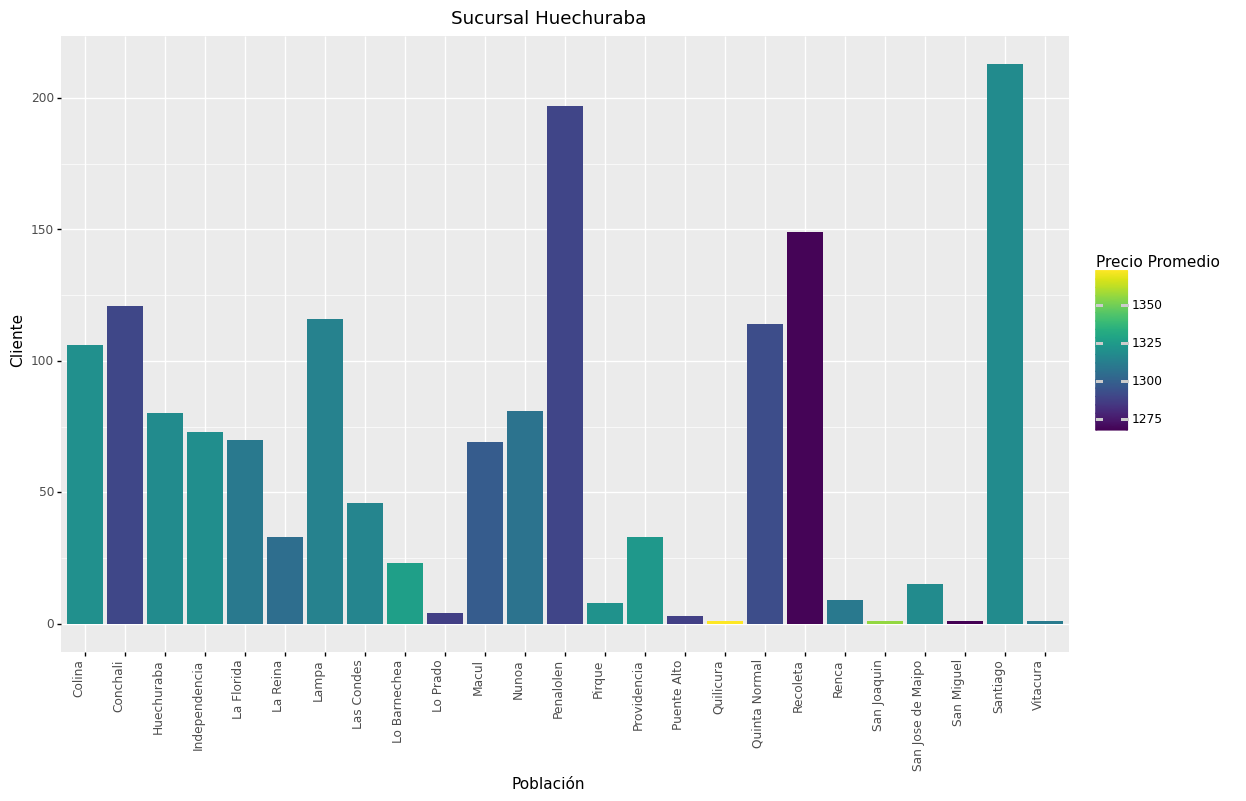

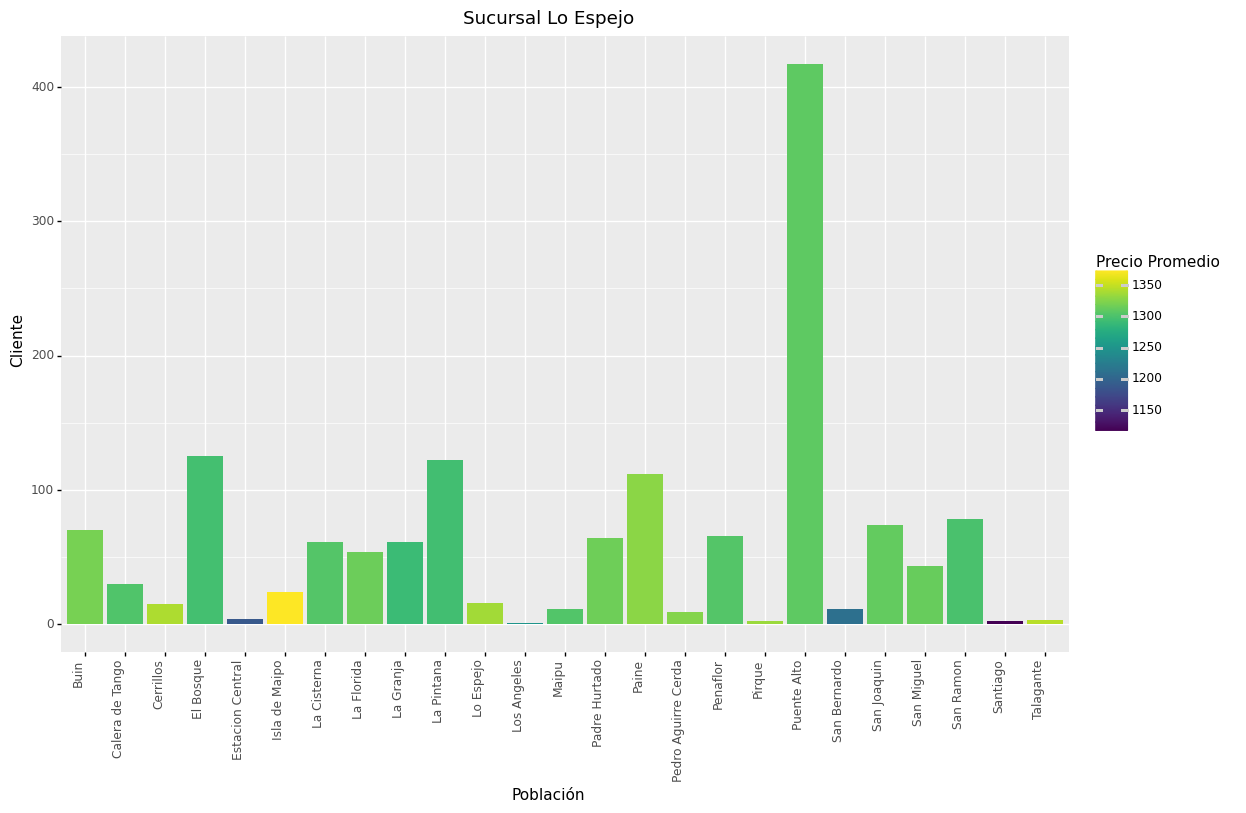

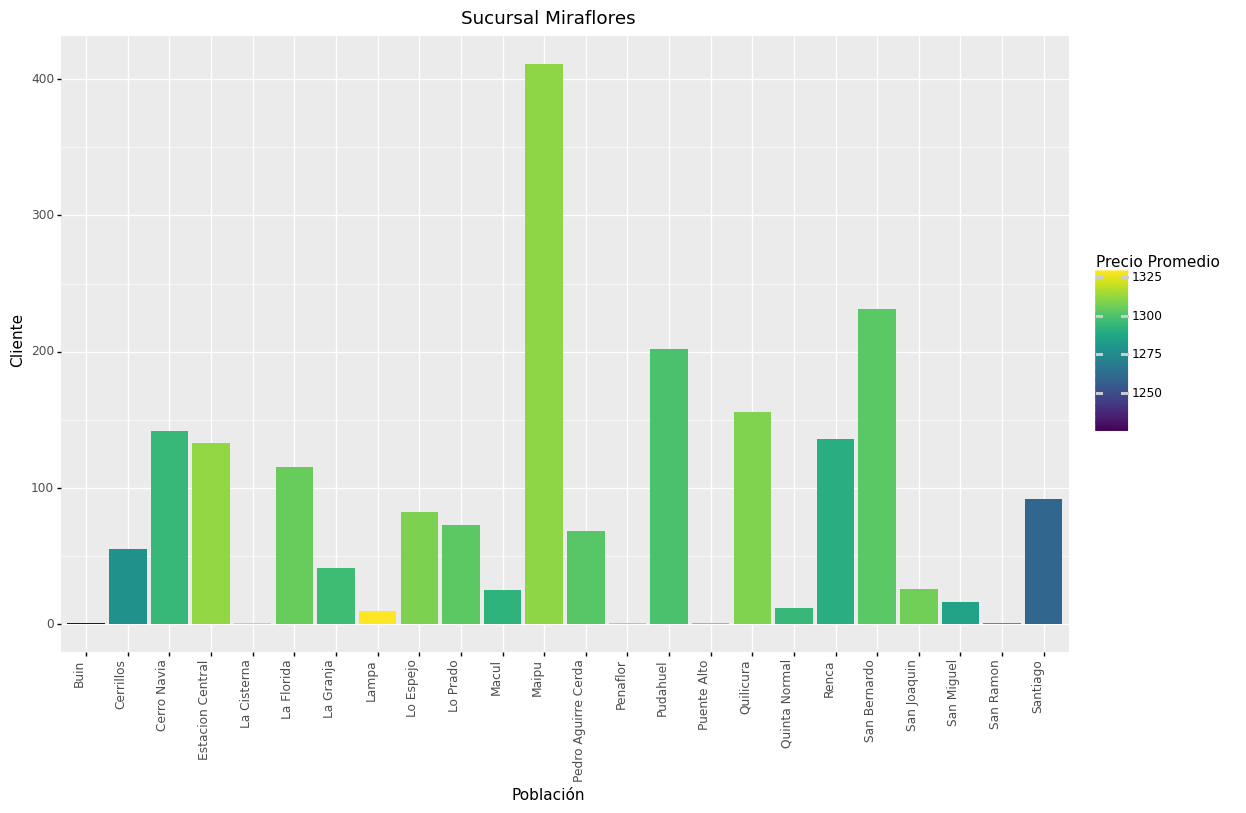

[<ggplot: (140500270514)>, <ggplot: (140500217826)>, <ggplot: (140456704353)>]

In [365]:


S_ajust=' Promedio'
X_G=Dic_col['Ubicacion'][1]
Y_G='Cliente'
Color_G=Dic_col['Ubicacion'][0]
# Lim_X=2250
# Lim_Y=1900

list_ggplot=[]
c=0
Colores=['red','green','blue']
for i in df[Color_G].unique():
    print(i)
    df_i=df[df[Color_G]==i].copy()
    df_i[Y_G]=df_i[Y_G].astype('int64')
    
    list_ggplot.append\
    (
        ggplot(
            df_i[df_i[Y_G]>0], 
            aes(x=X_G, y=Y_G
                , fill='Precio Promedio'
               )
        )
        + geom_col()#fill=Colores[c]
        +ggtitle(i)
        +theme(axis_text_x = element_text(angle=90, hjust=1),figure_size=(13,8)
              )
    )
    c+=1
print(c)
list_ggplot

###### Un grafic, gradier de precio 

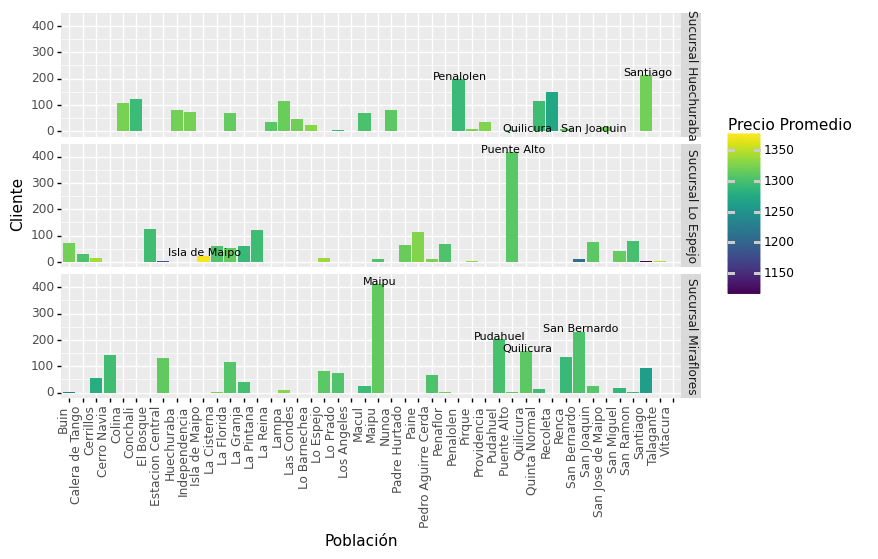

<ggplot: (140501331583)>

In [366]:


S_ajust=' Promedio'
X_G=Dic_col['Ubicacion'][1]
Y_G='Cliente'
Color_G=Dic_col['Ubicacion'][0]
# Lim_X=2250
# Lim_Y=1900

G_col_Prec=(
        ggplot(
            df[df[Y_G]>0], 
            aes(x=X_G, y=Y_G
                , fill='Precio Promedio'
                ,label=X_G
               )
        )
        +facet_grid('Centro~.')
        + geom_col()#fill=Colores[c]
        #+ggtitle(i)
        +theme(axis_text_x = element_text(angle=90, hjust=1),figure_size=(8,5))
    
        +geom_text(
            df[
            (df['Precio Promedio']>1350)|#(df['Precio Promedio']<=1250)|
                (df[Y_G]>=150)]
            ,ha='center', va='center', size=8 ,
            color='black'
            ,nudge_x=0.1, nudge_y=10     
                  )
    )
G_col_Prec

###### Un grafico gradier KG 

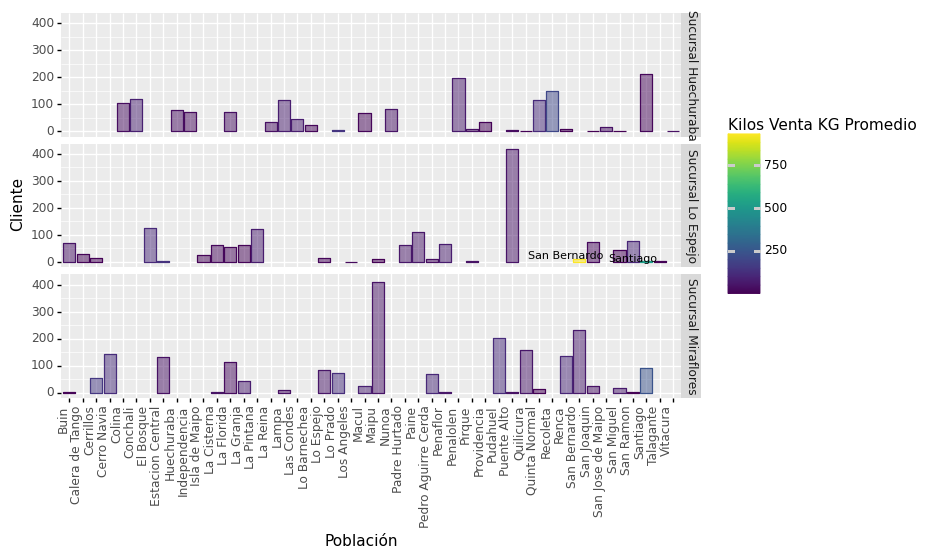

<ggplot: (140500474405)>

In [383]:


S_ajust=' Promedio'
X_G=Dic_col['Ubicacion'][1]
Y_G='Cliente'
Color_G=Dic_col['Ubicacion'][0]
# Lim_X=2250
# Lim_Y=1900

G_col_KG=(
        ggplot(
            df[df[Y_G]>0], 
            aes(x=X_G, y=Y_G
                , color='Kilos Venta KG Promedio'
                , fill='Kilos Venta KG Promedio'
                ,label=X_G
               )
        )
        +facet_grid('Centro~.')
        + geom_col(alpha=0.5)#fill=Colores[c]
        #+ggtitle(i)
        
# +scale_y_continuous( breaks=range(350,1900,250))


    
        +theme(axis_text_x = element_text(angle=90, hjust=1),figure_size=(8,5))
    
        +geom_text(
            df[
             (df['Kilos Venta KG Promedio']>500)#|#(df['Precio Promedio']<=1250)|
                #(df[Y_G]>=150)
            ]
            ,ha='center', va='center', size=8 ,
            color='black'
            ,nudge_x=-1, nudge_y=11     
                  )
    )
G_col_KG

### Puntos 

###### Promedio general 

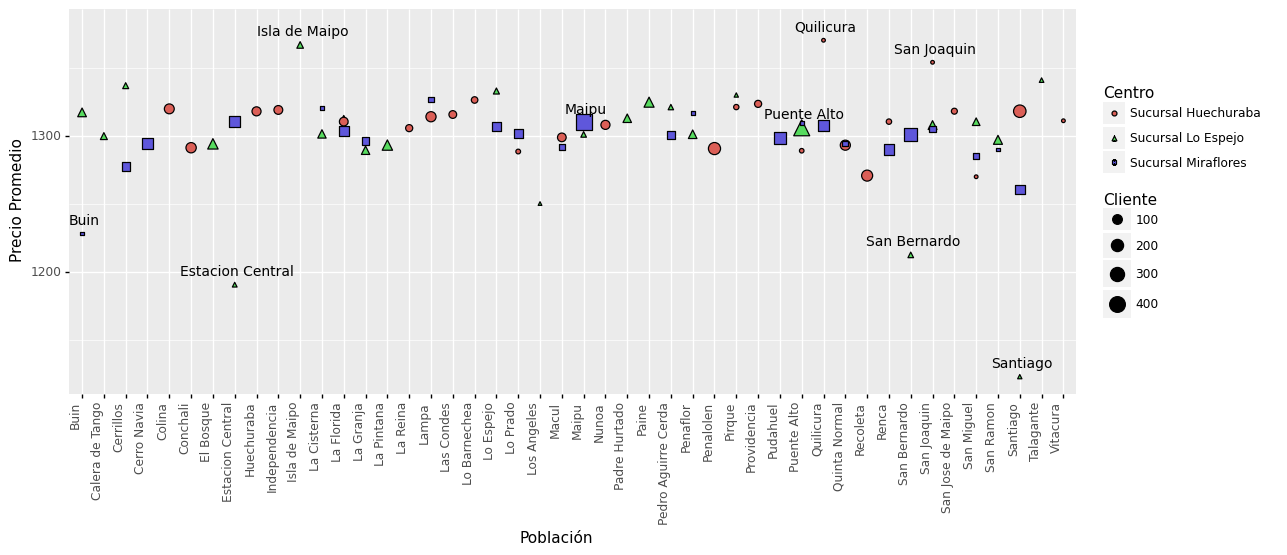

<ggplot: (140456477037)>

In [260]:
#Construye df de la cantidad de clientes que hay en Población/Sucursal

df=Count_Clientes.groupby(Dic_col['Ubicacion']).count().reset_index()

df=pd.merge(
df,df_group, how = 'inner',
)


S_ajust=' Promedio'
X_G=Dic_col['Ubicacion'][1]
Y_G='Precio Promedio'
Color_G=Dic_col['Ubicacion'][0]
G_size='Cliente'
# 'Kilos Venta KG Promedio'


# Lim_X=2250




G_point_prec=(
        ggplot(
            df, 
            aes(x=X_G, y=Y_G
                , fill=Color_G
               ,label=X_G #Color_G
                ,size= G_size
                ,shape=Color_G
#                 'Kilos Venta KG Promedio'
#                 'Precio Promedio'
           )
        )
        #+ geom_col()
        +geom_point()
        +geom_text(
            df[
            (df[Y_G]>1350)|(df[Y_G]<=1250)|(df[G_size]>=250)]
            ,ha='center', va='center', size=10 ,
            color='black'
#             ,adjust_text=True
            ,nudge_x=0.1, nudge_y=10     
                  )
        
        +theme(axis_text_x = element_text(angle=90, hjust=1),figure_size=(13,5)
              )
        +ggtitle('')
    )
G_point_prec

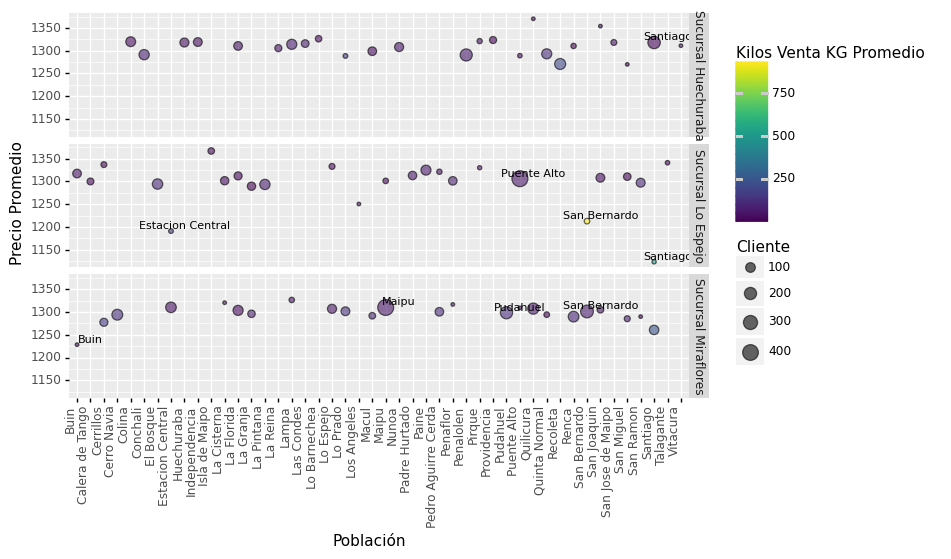

<ggplot: (140501253916)>

In [394]:


S_ajust=' Promedio'
X_G=Dic_col['Ubicacion'][1]
Y_G='Precio Promedio'
#'Cliente'
Color_G=Dic_col['Ubicacion'][0]
# Lim_X=2250
# Lim_Y=1900

G_point_KG=(
        ggplot(
            df[df[Y_G]>0], 
            aes(x=X_G, y=Y_G
                , color='Kilos Venta KG Promedio'
                , fill='Kilos Venta KG Promedio'
                ,label=X_G
                ,size='Cliente'
               )
        )
        +facet_grid('Centro~.')
        + geom_point(alpha=0.6,color='black')#fill=Colores[c]
        #+ggtitle(i)
        
        +scale_y_continuous( breaks=range(800,1900,50))#,limits=(800,1900))


    
        +theme(axis_text_x = element_text(angle=90, hjust=1),figure_size=(8,5))
    
        +geom_text(
            df[
             (df['Kilos Venta KG Promedio']>500)|(df['Precio Promedio']<=1250)
                |(df['Cliente']>=200)
            ]
            ,ha='center', va='center', size=8 ,
            color='black'
            ,nudge_x=1, nudge_y=12     
                  )
    )
G_point_KG

###  Save


##### Graficos 

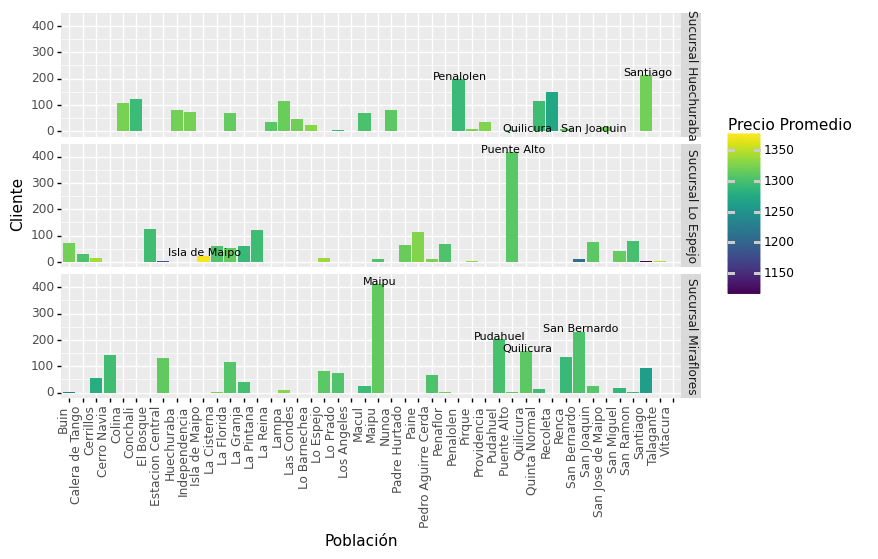

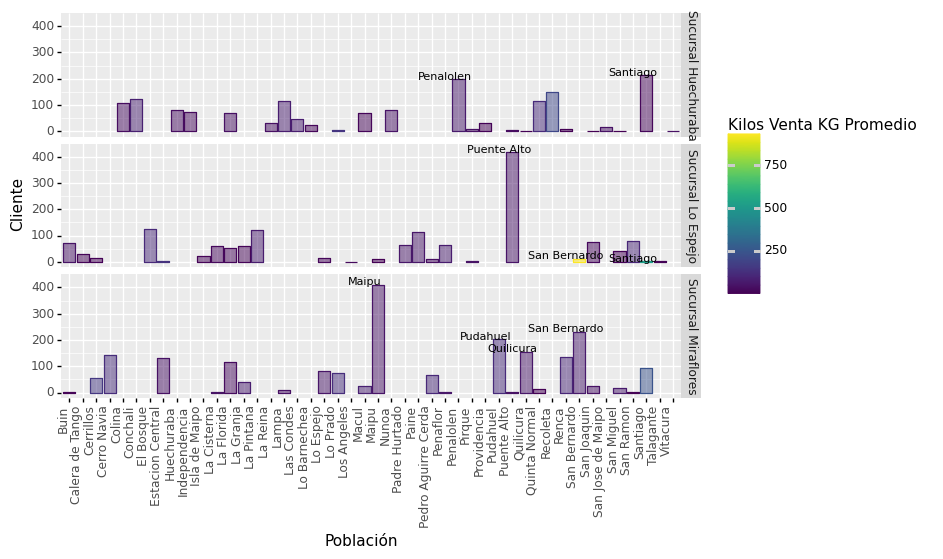

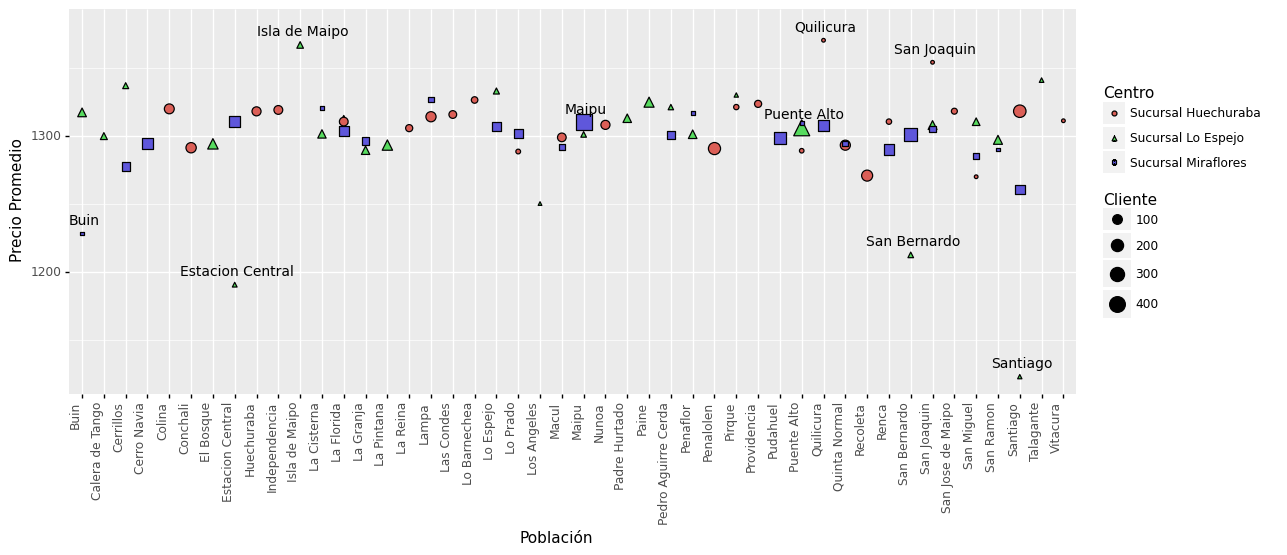

[<ggplot: (140501881326)>, <ggplot: (140533908333)>, <ggplot: (140456477037)>]

In [262]:
[G_col_Prec , G_col_KG , G_point_prec]

##### PNJ SAVE 

In [272]:
j=0
for i in ['Columna Precio','Columna KG','Puntos Precio']:
    G_Lista=[G_col_Prec , G_col_KG , G_point_prec]
    file_name= 'Ubicación'+i
    
    pngfill= Png_file_direct_Graphic_Canal_Material+"\\Ubicación"
    
    ggsave(plot = G_Lista[j]
       ,filename = file_name, 
       path =pngfill
      ,dpi = 300
      )
    j+=1

C:\Users\user\anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 8 x 5 in image.
C:\Users\user\anaconda3\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: C:\Users\user\Documents\Graficos\Canal Tradicional\1010078\Ubicación\UbicaciónColumna Precio
C:\Users\user\anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 8 x 5 in image.
C:\Users\user\anaconda3\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: C:\Users\user\Documents\Graficos\Canal Tradicional\1010078\Ubicación\UbicaciónColumna KG
C:\Users\user\anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 13 x 5 in image.
C:\Users\user\anaconda3\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: C:\Users\user\Documents\Graficos\Canal Tradicional\1010078\Ubicación\UbicaciónPuntos Precio


##### PDF SAVE 

In [270]:
#```python
#============================
# Se guardan variaciones lineales
#============================
start_time = time.time()
save_as_pdf_pages(
                    [G_col_Prec , G_col_KG , G_point_prec]
                    ,Png_file_direct_Graphic_Canal_Material +"\\Ubicación"+"\\Ubicacion Sobre P y KG"+ ".pdf")
time_convert(time.time()-start_time)
#```

C:\Users\user\anaconda3\lib\site-packages\plotnine\ggplot.py:820: PlotnineWarning: Filename: C:\Users\user\Documents\Graficos\Canal Tradicional\1010078\Ubicación\Ubicacion Sobre P y KG.pdf


Time Lapsed = 0:0:3.2197635173797607 
 H:m:s



file_name='Dispersión Mean(Precios_Volumen)_4_each_Cliente'
ggsave(plot = p,
       filename = file_name, 
       path =Png_file_direct_Graphic_Canal_Material+'\\'+Carpeta
      ,dpi = 300
      )


### P/Q Promedio Cliente 

###### Un grafic, gradier de precio 

In [32]:
df_group

,Centro,Población,Kilos Venta KG Promedio,Precio Promedio
0,Sucursal Huechuraba,Colina,50.146487,1319.822459
1,Sucursal Huechuraba,Conchali,100.875391,1291.303813
2,Sucursal Huechuraba,Huechuraba,53.382257,1318.001305
3,Sucursal Huechuraba,Independencia,46.047619,1319.031905
4,Sucursal Huechuraba,La Florida,59.078922,1310.477767
...,...,...,...,...
69,Sucursal Miraflores,San Bernardo,81.135797,1301.318375
70,Sucursal Miraflores,San Joaquin,63.492063,1305.091806
71,Sucursal Miraflores,San Miguel,81.514825,1285.397574
72,Sucursal Miraflores,San Ramon,22.000000,1290.000000


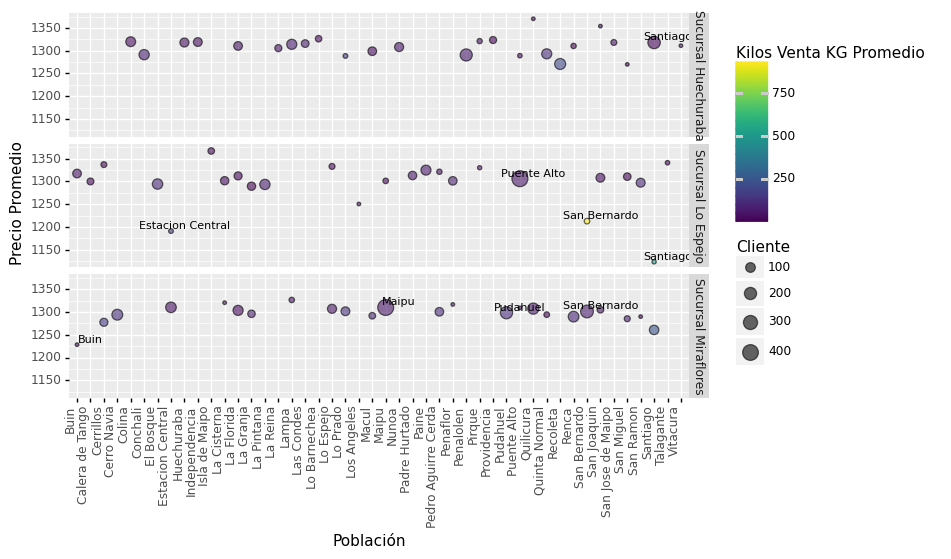

<ggplot: (140501253916)>

In [394]:


S_ajust=' Promedio'
X_G=Dic_col['Ubicacion'][1]
Y_G='Precio Promedio'
#'Cliente'
Color_G=Dic_col['Ubicacion'][0]
# Lim_X=2250
# Lim_Y=1900

G_point_P_KG=(
        ggplot(
            df[df[Y_G]>0], 
            aes(x=X_G, y=Y_G
                , color='Kilos Venta KG Promedio'
                , fill='Kilos Venta KG Promedio'
                ,label=X_G
                ,size='Cliente'
               )
        )
        +facet_grid('Centro~.')
        + geom_point(alpha=0.6,color='black')#fill=Colores[c]
        #+ggtitle(i)
        
        +scale_y_continuous( breaks=range(800,1900,50))#,limits=(800,1900))


    
        +theme(axis_text_x = element_text(angle=90, hjust=1),figure_size=(8,5))
    
        +geom_text(
            df[
             (df['Kilos Venta KG Promedio']>500)|(df['Precio Promedio']<=1250)
                |(df['Cliente']>=200)
            ]
            ,ha='center', va='center', size=8 ,
            color='black'
            ,nudge_x=1, nudge_y=12     
                  )
    )
G_point_P_KG

## Boxplot 

### Promedio cliente 

#### Data

In [311]:
df=data_i.groupby(['Centro','Cliente']).mean().reset_index()
df=df.dropna()
df.head()

,Centro,Cliente,Kilos Venta KG,Precio,Año Creación,Frecuencia Historica
0,Sucursal Huechuraba,10028999,22.000000,1320.923077,2007.0,62.0
1,Sucursal Huechuraba,10034580,544.695652,1121.057971,2011.0,223.0
2,Sucursal Huechuraba,10044200,22.000000,1396.666667,2020.0,8.0
3,Sucursal Huechuraba,10051077,115.021583,1218.338129,2007.0,226.0
4,Sucursal Huechuraba,10052251,22.076923,1352.307692,2007.0,47.0


In [312]:
df.describe()

,Kilos Venta KG,Precio,Año Creación,Frecuencia Historica
count,5073.000000,5073.000000,5073.000000,5073.000000
mean,58.246006,1286.857063,2013.460871,83.384585
std,143.578127,77.163557,5.195213,120.764643
min,18.000000,800.000000,2007.000000,6.000000
25%,22.000000,1248.583333,2007.000000,14.000000
50%,22.062500,1293.833333,2014.000000,30.000000
75%,34.222222,1333.684211,2019.000000,90.000000
max,2443.104839,1690.000000,2021.000000,1088.000000


In [313]:
df_mean=df\
.groupby(['Centro']).mean().reset_index()

df_mean.head()

,Centro,Kilos Venta KG,Precio,Año Creación,Frecuencia Historica
0,Sucursal Huechuraba,47.508693,1295.231289,2013.736439,78.180600
1,Sucursal Lo Espejo,57.889954,1280.941843,2013.250169,78.197966
2,Sucursal Miraflores,66.788865,1284.691891,2013.401280,91.166420


#### Grafica 

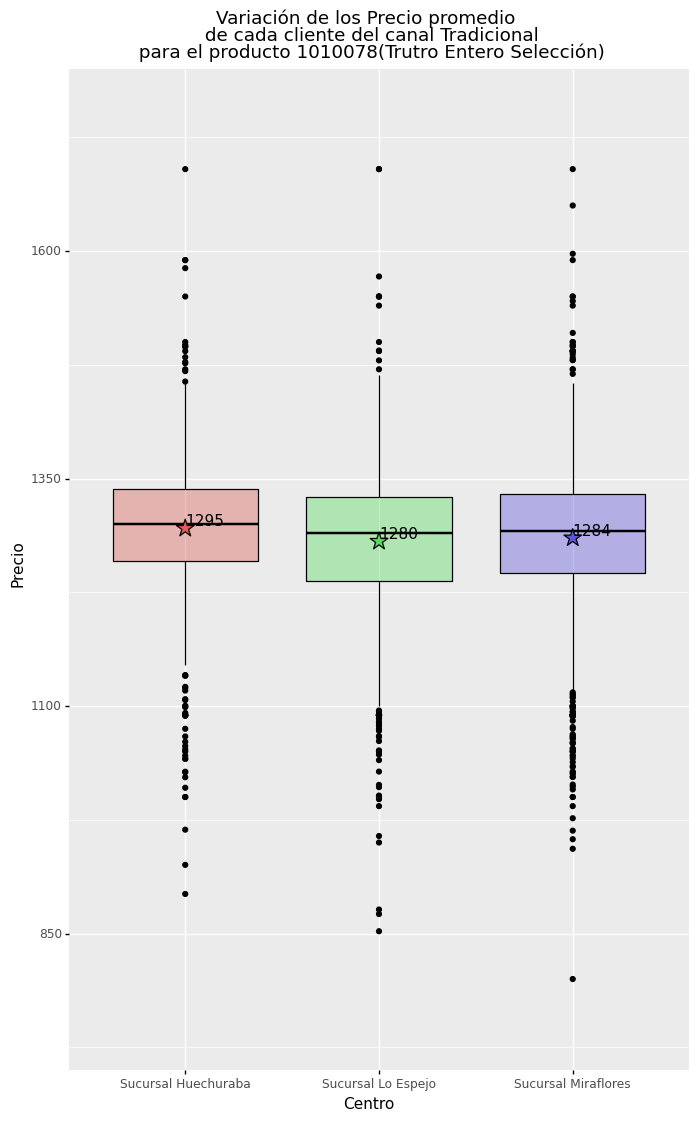

<ggplot: (140536875843)>

In [314]:
s=data_i['Material (Nombre)'].unique()[0]
Y_Graph='Precio'
S_ajust=' Promedio'

X_G=Dic_col['Ubicacion'][0]
Y_G='Cliente'
Color_G=Dic_col['Ubicacion'][0]
# Lim_X=2250
# Lim_Y=1900

(
ggplot(
    df_mean
    ,aes(
        x= X_G
        ,y= Y_Graph 
        ,color=X_G
        ,fill=X_G
    ))


+ geom_boxplot(df,color='black',alpha=0.4)
    
+ geom_point(df_mean
             ,shape='*',color='black',
             size=7)
             #,
             #fill=df['Año'],
             #)#df['Año'])


+geom_text(
         label=df_mean[Y_Graph].astype('int64')
        ,ha='left',color='black',va='bottom'
        ,lineheight=14
        )#hjust=0,vjust=0    
    
    
+coord_cartesian(ylim = [750,1750])
+scale_y_continuous( breaks=range(350,1750,250))
#limits=(350,1900), Se eliminó el atributo limits, pero se dejo el break    
    
+ggtitle('Variación de los ' +Y_Graph + ' promedio \n de cada cliente'
            + ' del canal '+ Tipo_de_Cliente 
            +'\n para el producto '+s)

+theme(axis_text_x = element_text(hjust=0.5),figure_size=(8,13)
      ,legend_position='none'
      )

)

### Facturaciones 

#### Data

In [315]:
df=data_i.copy()
df=df.dropna()
df.head()

,Material (Nombre),Kilos Venta KG,Precio,Día natural,Día Semana,Semana,Mes,Año,Población,Centro,Cliente,Cluster,Segmento.1,Categoría Cliente,Año Creación,Material Favorito,Frecuencia Historica,Mes_num
61455,1010078(Trutro Entero Selección),22,1300,2020-05-23,Sábado,21,Mayo,2020,La Pintana,Sucursal Lo Espejo,10003742,Clásico,Cobertura Pequeno SD,Especialista en Proc,2007,1010077,19,5
61456,1010078(Trutro Entero Selección),110,1174,2018-03-01,Jueves,9,Marzo,2018,Puente Alto,Sucursal Lo Espejo,10007508,Clásico,Cobertura Mediano SD,Especialista en Crud,2007,1020253,464,3
61457,1010078(Trutro Entero Selección),66,1174,2018-03-08,Jueves,10,Marzo,2018,Puente Alto,Sucursal Lo Espejo,10007508,Clásico,Cobertura Mediano SD,Especialista en Crud,2007,1020253,464,3
61458,1010078(Trutro Entero Selección),66,1033,2018-03-20,Martes,12,Marzo,2018,Puente Alto,Sucursal Lo Espejo,10007508,Clásico,Cobertura Mediano SD,Especialista en Crud,2007,1020253,464,3
61459,1010078(Trutro Entero Selección),65,1100,2018-03-27,Martes,13,Marzo,2018,Puente Alto,Sucursal Lo Espejo,10007508,Clásico,Cobertura Mediano SD,Especialista en Crud,2007,1020253,464,3


In [316]:
df.describe()

,Kilos Venta KG,Precio,Año Creación,Frecuencia Historica
count,198596.000000,198596.000000,198596.000000,198596.000000
mean,95.996264,1288.954299,2011.913236,267.705679
std,215.691357,132.489703,4.913140,190.032728
min,1.000000,61.000000,2007.000000,6.000000
25%,22.000000,1200.000000,2007.000000,112.000000
50%,44.000000,1290.000000,2011.000000,250.000000
75%,88.000000,1377.000000,2017.000000,367.000000
max,11004.000000,2502.000000,2021.000000,1088.000000


In [317]:
df_mean=df\
.groupby(['Centro']).mean().reset_index()

df_mean.head()

,Centro,Kilos Venta KG,Precio,Año Creación,Frecuencia Historica
0,Sucursal Huechuraba,93.654225,1290.176207,2012.273345,270.115782
1,Sucursal Lo Espejo,86.532175,1294.266508,2011.533187,257.445834
2,Sucursal Miraflores,103.074093,1285.041109,2011.905375,272.195712


#### Grafica 

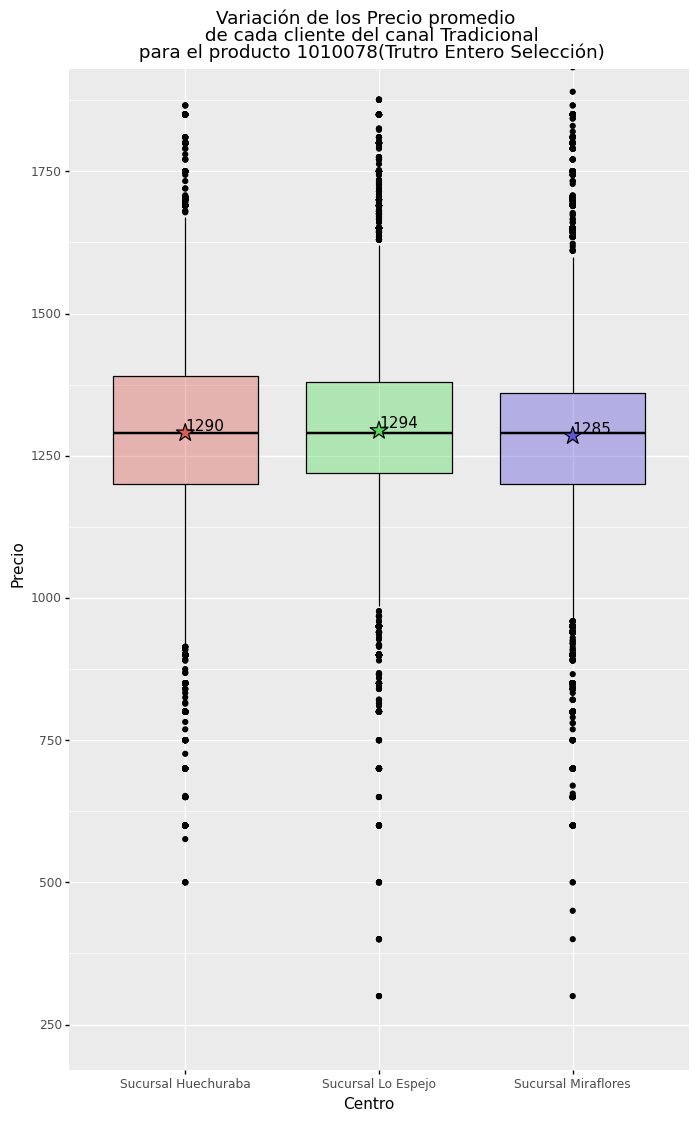

<ggplot: (140536125495)>

In [351]:
s=data_i['Material (Nombre)'].unique()[0]
Y_Graph='Precio'
S_ajust=' Promedio'

X_G=Dic_col['Ubicacion'][0]
Y_G='Cliente'
Color_G=Dic_col['Ubicacion'][0]
# Lim_X=2250
# Lim_Y=1900

(
ggplot(
    df_mean
    ,aes(
        x= X_G
        ,y= Y_Graph 
        ,color=X_G
        ,fill=X_G
    ))


+ geom_boxplot(df,color='black',alpha=0.4)
    
+ geom_point(df_mean
             ,shape='*',color='black',
             size=7)
             #,
             #fill=df['Año'],
             #)#df['Año'])


+geom_text(
         label=df_mean[Y_Graph].astype('int64')
        ,ha='left',color='black',va='bottom'
        ,lineheight=14
        )#hjust=0,vjust=0    
    
    
+coord_cartesian(ylim = [250,1850])
+scale_y_continuous( breaks=range(250,1850,250))
#limits=(350,1900), Se eliminó el atributo limits, pero se dejo el break    
    
+ggtitle('Variación de los ' +Y_Graph + ' promedio \n de cada cliente'
            + ' del canal '+ Tipo_de_Cliente 
            +'\n para el producto '+s)

+theme(axis_text_x = element_text(hjust=0.5),figure_size=(8,13)
      ,legend_position='none'
      )

)

In [352]:
Caso_Precio_Bajo=data_i[data_i.Precio<250][
    Dic_col['Base']+['Año','Mes']+Dic_col['Ubicacion']+Dic_col['Cliente Categoria']]
Caso_Precio_Bajo.head()

,Material (Nombre),Kilos Venta KG,Precio,Cliente,Año,Mes,Centro,Población,Cluster,Segmento.1,Categoría Cliente
120421,1010078(Trutro Entero Selección),22,61,14197249,2020,Marzo,Sucursal Miraflores,San Joaquin,Premium,Cobertura Mediano SD,Especialista en Crud


In [343]:
Caso_Precio_Bajo.groupby('Cliente').count().reset_index()\
[Caso_Precio_Bajo.groupby('Cliente').count().reset_index()['Precio']>=2]

,Cliente,Material (Nombre),Kilos Venta KG,Precio,Año,Mes,Centro,Población,Cluster,Segmento.1,Categoría Cliente
1,12167578,2,2,2,2,2,2,2,2,2,2
7,6138059,6,6,6,6,6,6,6,6,6,6
12,76444651,2,2,2,2,2,2,2,2,2,2
14,77029777,4,4,4,4,4,4,4,4,4,4


In [347]:
Caso_Precio_Bajo[Caso_Precio_Bajo.Cliente=='77029777']

,Material (Nombre),Kilos Venta KG,Precio,Cliente,Año,Mes,Centro,Población,Cluster,Segmento.1,Categoría Cliente
245181,1010078(Trutro Entero Selección),330,400,77029777,2020,Enero,Sucursal Lo Espejo,Buin,Clásico,Cobertura Mediano SD,Multiespecialista
245182,1010078(Trutro Entero Selección),154,300,77029777,2020,Enero,Sucursal Lo Espejo,Buin,Clásico,Cobertura Mediano SD,Multiespecialista
245183,1010078(Trutro Entero Selección),22,400,77029777,2020,Enero,Sucursal Lo Espejo,Buin,Clásico,Cobertura Mediano SD,Multiespecialista
245184,1010078(Trutro Entero Selección),110,300,77029777,2020,Enero,Sucursal Lo Espejo,Buin,Clásico,Cobertura Mediano SD,Multiespecialista
